In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib notebook

In [2]:
from collections import defaultdict

In [3]:
save_figs = False

In [4]:
df = pd.read_csv('/Users/aleverentz/Documents/c-quest/databases/All_mars_v8.dat', delim_whitespace=True)
print df.head().to_string()
print "\n{} rows, {} columns".format(*df.shape)

  elt  ex  wav_nist  wav_mars  RelInt  Intensity  Base Target
0  Fe  II   241.125   241.133   300.0    501.938  MARS     Fe
1  Ni  II   241.686   241.703  2000.0     27.348  MARS     Ni
2  Mn  II   242.812   242.841    20.0     49.994  MARS     Mn
3  Mn  II   242.846   242.841    50.0     49.994  MARS     Mn
4  Mn  II   243.811   243.789    30.0     64.699  MARS     Mn

1474 rows, 8 columns


<IPython.core.display.Javascript object>


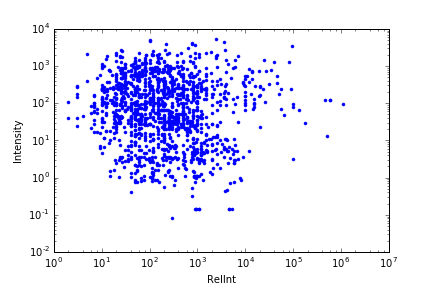

<IPython.core.display.Javascript object>


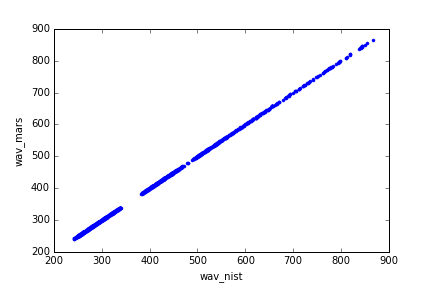

In [5]:
fig, ax = plt.subplots()
ax.loglog(df["RelInt"], df["Intensity"], '.')
ax.set_xlabel("RelInt")
ax.set_ylabel("Intensity")

fig, ax = plt.subplots()
ax.plot(df["wav_nist"], df["wav_mars"], '.')
ax.set_xlabel("wav_nist")
ax.set_ylabel("wav_mars")
None

In [6]:
wav_mars_by_elt = defaultdict(list)
wav_mars_by_elt_ex = defaultdict(list)
for row_index, row in df.iterrows():
    elt = row["elt"]
    elt_ex = row["elt"] + ":" + row["ex"]
    wav_mars_by_elt[elt].append(row["wav_mars"])
    wav_mars_by_elt_ex[elt_ex].append(row["wav_mars"])
print "{} elements".format(len(wav_mars_by_elt))
print "{} element-ex pairs".format(len(wav_mars_by_elt_ex))

33 elements
67 element-ex pairs


In [7]:
from IPython.display import display, HTML

In [8]:
peak_summary = []
for elt in sorted(wav_mars_by_elt.keys()):
    num_peaks = len(wav_mars_by_elt[elt])
    peak_summary.append([elt, num_peaks])

df_summary = pd.DataFrame(peak_summary, columns = ["element", "num_peaks"])
display(HTML(df_summary.to_html(index = False)))

element,num_peaks
Al,28
Ar,5
As,1
B,1
Ba,3
Be,2
C,33
Ca,50
Cl,27
Cr,2


In [9]:
peaks_near_wavelength_by_elt_ex = defaultdict(lambda: defaultdict(list))

delta = 1.

low = np.floor(min(df["wav_mars"]) - delta)
high = np.ceil(max(df["wav_mars"]) + delta)
for x in np.arange(low, high, delta):
    for elt_ex, wavelengths in wav_mars_by_elt_ex.items():
        for peak_w in wavelengths:
            if abs(peak_w - x) < delta:
                if peak_w not in peaks_near_wavelength_by_elt_ex[x][elt_ex]:
                    peaks_near_wavelength_by_elt_ex[x][elt_ex].append(peak_w)
    elts = peaks_near_wavelength_by_elt_ex[x]
    if len(elts) > 0:
        num_elts = len(set([e.split(":")[0] for e in elts]))
        num_elt_ex = len(elts)
        num_peaks = sum(len(ps) for e, ps in elts.items())
        print "Near {}:\n# distinct elements = {}\n# distinct elt-ex pairs = {}\n# distinct peaks = {}" \
            .format(x, num_elts, num_elt_ex, num_peaks)
        for e in sorted(elts.keys()):
            ps = elts[e]
            for i, p in enumerate(sorted(ps)):
                if i == 0:
                    print "    {:7s}: {:.2f}".format(e, p)
                else:
                    print "             {:.2f}".format(p)
        print ""
print "DONE"

Near 241.0:
# distinct elements = 2
# distinct elt-ex pairs = 2
# distinct peaks = 2
    Fe:II  : 241.13
    Ni:II  : 241.70

Near 242.0:
# distinct elements = 3
# distinct elt-ex pairs = 3
# distinct peaks = 3
    Fe:II  : 241.13
    Mn:II  : 242.84
    Ni:II  : 241.70

Near 243.0:
# distinct elements = 2
# distinct elt-ex pairs = 2
# distinct peaks = 3
    Mn:II  : 242.84
             243.79
    Ni:II  : 243.86

Near 244.0:
# distinct elements = 2
# distinct elt-ex pairs = 2
# distinct peaks = 2
    Mn:II  : 243.79
    Ni:II  : 243.86

Near 245.0:
# distinct elements = 1
# distinct elt-ex pairs = 1
# distinct peaks = 1
    Mn:II  : 245.32

Near 246.0:
# distinct elements = 2
# distinct elt-ex pairs = 2
# distinct peaks = 2
    Fe:II  : 246.21
    Mn:II  : 245.32

Near 247.0:
# distinct elements = 2
# distinct elt-ex pairs = 2
# distinct peaks = 3
    C:I    : 247.93
             247.96
    Fe:II  : 246.21

Near 248.0:
# distinct elements = 3
# distinct elt-ex pairs = 4
# distinct pea

In [10]:
df_sorted_wav_mars = df.sort_values(by = "wav_mars")
sorted_wav_mars = df_sorted_wav_mars["wav_mars"]

In [11]:
from peaks_util import extract_peaks, nearby_peaks, label_peaks_parsimonious, label_peaks_verbose

In [12]:
for w in [249, 277]:
    delta = 1.0
    i_lo, i_hi = nearby_peaks(sorted_wav_mars, w, delta)
    df_subset = df_sorted_wav_mars.iloc[i_lo : i_hi, :]
    #df_subset = df_subset.sort_values(by = ["elt", "ex", "wav_mars"])
    df_subset = df_subset.sort_values(by = "Intensity", ascending = False)
    print "Peaks at {} +/- {}:\n{}".format(
        w,
        delta,
        df_subset.to_string())

Peaks at 249 +/- 1.0:
   elt   ex  wav_nist  wav_mars   RelInt  Intensity  Base  Target
16  Fe   II   249.393   249.393    100.0   1233.640  MARS      Fe
14  Fe    I   249.066   249.076     50.0    828.159  MARS      Fe
11  Fe   II   248.341   248.333    100.0    628.802  MARS      Fe
15  Fe    I   249.139   249.103   3000.0     91.788  MARS      Fe
17  Fe   II   249.401   249.439    500.0     73.568  MARS  cibles
18  Fe    I   249.475   249.439     60.0     73.568  MARS  cibles
19  Fe    I   249.965   249.902    150.0     70.994  MARS      Fe
12  Fe    I   248.402   248.357  10000.0     67.124  MARS      Fe
20  Mn   II   249.975   249.909     50.0     58.818  MARS      Mn
13  Cu  III   248.721   248.677    700.0      6.984  MARS      Cu
Peaks at 277 +/- 1.0:
    elt  ex  wav_nist  wav_mars  RelInt  Intensity  Base      Target
248  Fe  II   278.012   277.986    40.0    765.526  MARS          Fe
237  Fe   I   276.834   276.778   250.0    731.145  MARS          Fe
239  Fe   I   277.012  

In [13]:
from data_util import row_to_spectrum

In [14]:
delta = 0.25

208 peaks


<IPython.core.display.Javascript object>


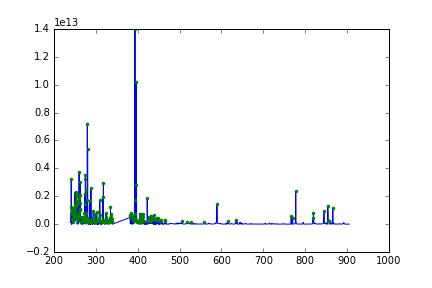

In [15]:
row = pd.read_csv("../data/CCS/subsetShots_5pct.csv", nrows=100).iloc[0, :]
x, y = row_to_spectrum(row)

px, py = extract_peaks(x, y, threshold_fraction = 0.01, delta = delta)

print "{} peaks".format(len(px))
fig, ax = plt.subplots()
ax.plot(x, y)
ax.plot(px, py, 'g.')
None

In [16]:
from plot_util import show_labeled_spectrum

In [17]:
xlo = 420
xwidth = 20

Elements used (13): Fe, Ti, Mn, Ca, Cu, Na, K, Ni, O, V, C, Mg, Si
Unlabeled peaks (15 of 208): 241.40, 242.47, 244.56, 245.94, 246.74, 247.11, 247.38, 257.17, 382.19, 394.16, 527.00, 855.86, 856.25, 856.65, 857.05


<IPython.core.display.Javascript object>


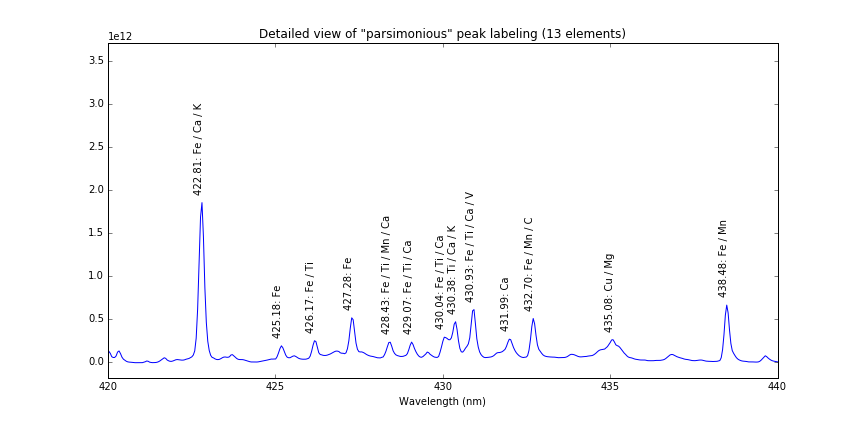

In [18]:
e_to_p, p_to_e, u = label_peaks_parsimonious(px, df_sorted_wav_mars, delta = delta)
print "Elements used ({}): {}".format(len(e_to_p), ', '.join(e_to_p.keys()))
print "Unlabeled peaks ({} of {}): {}".format(len(u), len(px), ", ".join(["{:.2f}".format(ui) for ui in u]))
elements_parsimonious = e_to_p.keys()
p_to_e_parsimonious = p_to_e
ax = show_labeled_spectrum(x = x, y = y, px = px, py = py, xlo = xlo, xhi = xlo + xwidth, p_to_e = p_to_e)
ax.set_title("Detailed view of \"parsimonious\" peak labeling ({} elements)".format(len(e_to_p)))
if save_figs: plt.savefig("example_peak_label_parsimonious.png")
None

Elements used (23): Fe, Ti, Mn, Ca, Cu, Na, K, Ni, O, V, C, Mg, Si; Al, Ba, Cl, F, Li, Pb, S, Sr, Zn, Zr
Unlabeled peaks (15 of 208): 241.40, 242.47, 244.56, 245.94, 246.74, 247.11, 247.38, 257.17, 382.19, 394.16, 527.00, 855.86, 856.25, 856.65, 857.05


<IPython.core.display.Javascript object>


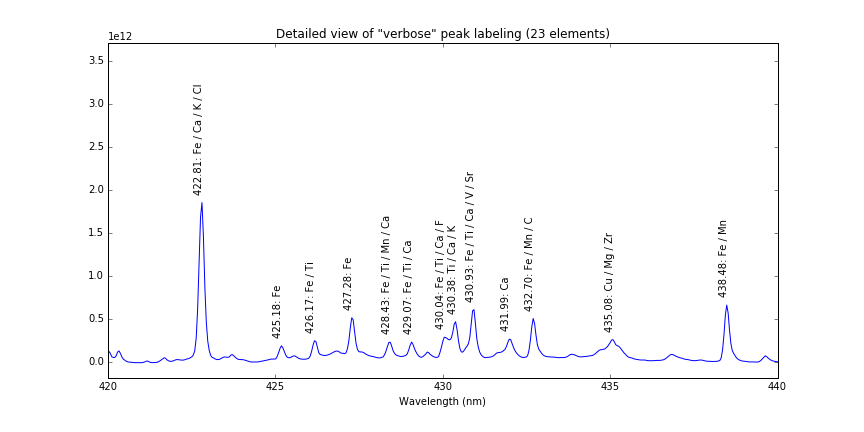

In [19]:
e_to_p, p_to_e, u = label_peaks_verbose(px, df_sorted_wav_mars, delta = delta)
elements_verbose_only = sorted(list(set(e_to_p.keys()) - set(elements_parsimonious)))
print "Elements used ({}): {}; {}".format(
    len(e_to_p),
    ', '.join(elements_parsimonious),
    ', '.join(elements_verbose_only))
print "Unlabeled peaks ({} of {}): {}".format(len(u), len(px), ", ".join(["{:.2f}".format(ui) for ui in u]))
ax = show_labeled_spectrum(x = x, y = y, px = px, py = py, xlo = xlo, xhi = xlo + xwidth,
                           p_to_e = p_to_e,
                           p_to_e_parsimonious = p_to_e_parsimonious)
ax.set_title("Detailed view of \"verbose\" peak labeling ({} elements)".format(len(e_to_p)))
if save_figs: plt.savefig("example_peak_label_verbose.png")
None

In [20]:
elt_exs = defaultdict(set)
for row_index, row in df_sorted_wav_mars.iterrows():
    #elt_exs[row["elt"], "_"].add(row["wav_mars"])
    elt_exs[row["elt"], row["ex"]].add(row["wav_mars"])

In [21]:
drop_if_below_fraction = 0.5
all_rows_to_drop = []
for elt_ex, wavs in elt_exs.items():
    denom = 0
    numer = 0
    for w in wavs:
        denom += 1
        i_lo, i_hi = nearby_peaks(px, w, delta = delta)
        nearby = px[i_lo : i_hi]
        if len(nearby) > 0:
            numer += 1
    fraction = numer / float(denom)
    if fraction < drop_if_below_fraction:
        elt, ex = elt_ex
        mask = (df_sorted_wav_mars["elt"] == elt) & (df_sorted_wav_mars["ex"] == ex)
        #mask = (df_sorted_wav_mars["elt"] == elt)
        rows_to_drop = df_sorted_wav_mars[mask]
        print "Would drop {} {} (num rows: {})".format(elt, ex, len(rows_to_drop))
        all_rows_to_drop.extend(np.where(mask)[0])
all_rows_to_drop = sorted(all_rows_to_drop)

print "Would drop a total of {} rows".format(len(all_rows_to_drop))

df_copy = df_sorted_wav_mars.copy()
df_copy.index = range(len(df_copy))
df_after_dropping = df_copy.drop(all_rows_to_drop)

df_dropped = df_copy.iloc[all_rows_to_drop, :]

assert len(df_dropped) + len(df_after_dropping) == len(df_sorted_wav_mars)

Would drop Ar II (num rows: 1)
Would drop Fe III (num rows: 13)
Would drop Cs II (num rows: 1)
Would drop V I (num rows: 56)
Would drop Na II (num rows: 4)
Would drop F II (num rows: 9)
Would drop Ca I (num rows: 38)
Would drop N I (num rows: 4)
Would drop P II (num rows: 4)
Would drop Cl I (num rows: 11)
Would drop Ar I (num rows: 4)
Would drop Si II (num rows: 13)
Would drop Zn I (num rows: 13)
Would drop Cu I (num rows: 26)
Would drop Sr I (num rows: 14)
Would drop Cu III (num rows: 11)
Would drop Ni I (num rows: 51)
Would drop Cl II (num rows: 14)
Would drop Rb I (num rows: 3)
Would drop Cl III (num rows: 2)
Would drop Cr I (num rows: 2)
Would drop Ni VII (num rows: 1)
Would drop Be II (num rows: 2)
Would drop C II (num rows: 19)
Would drop Pb II (num rows: 9)
Would drop V II (num rows: 22)
Would drop Ti I (num rows: 156)
Would drop N II (num rows: 10)
Would drop Al II (num rows: 17)
Would drop S I (num rows: 1)
Would drop B II (num rows: 1)
Would drop Li I (num rows: 8)
Would drop

Elements used (11): Fe, Ti, Ca, Mn, Mg, Al, Na, C, K, O, Ni
Unlabeled peaks (28 of 208): 241.40, 242.47, 244.56, 245.94, 246.74, 247.11, 247.38, 248.71, 257.17, 281.70, 334.23, 382.19, 386.15, 394.16, 399.09, 408.94, 431.99, 443.63, 445.60, 464.31, 527.00, 559.22, 616.45, 634.87, 855.86, 856.25, 856.65, 857.05


<IPython.core.display.Javascript object>


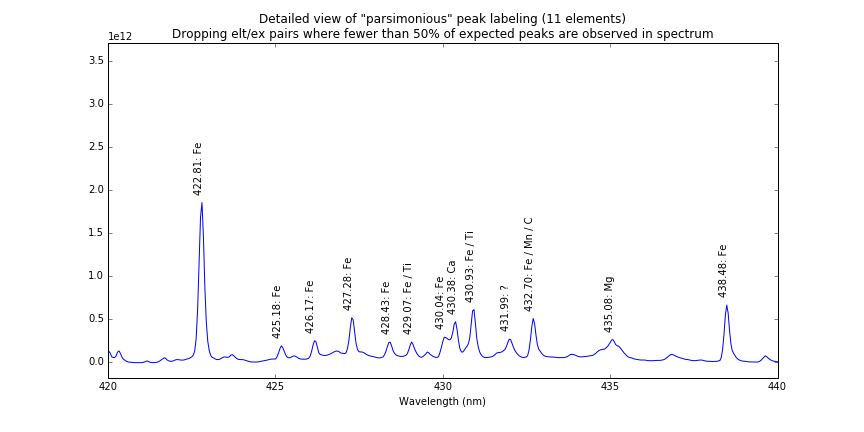

In [22]:
e_to_p, p_to_e, u = label_peaks_parsimonious(px, df_after_dropping, delta = delta)
print "Elements used ({}): {}".format(len(e_to_p), ', '.join(e_to_p.keys()))
print "Unlabeled peaks ({} of {}): {}".format(len(u), len(px), ", ".join(["{:.2f}".format(ui) for ui in u]))
elements_parsimonious = e_to_p.keys()
p_to_e_parsimonious = p_to_e
ax = show_labeled_spectrum(x = x, y = y, px = px, py = py, xlo = xlo, xhi = xlo + xwidth, p_to_e = p_to_e)
drop_msg = "Dropping elt/ex pairs where fewer than {}% of expected peaks are observed in spectrum" \
    .format(int(100 * drop_if_below_fraction))
ax.set_title("Detailed view of \"parsimonious\" peak labeling ({} elements)\n{}".format(len(e_to_p), drop_msg))
if save_figs: plt.savefig("example_peak_label_parsimonious_after_dropping.png")
None

Elements used (16): Fe, Ti, Ca, Mn, Mg, Al, Na, C, K, O, Ni; Ba, Pb, Si, Sr, Zr
Unlabeled peaks (28 of 208): 241.40, 242.47, 244.56, 245.94, 246.74, 247.11, 247.38, 248.71, 257.17, 281.70, 334.23, 382.19, 386.15, 394.16, 399.09, 408.94, 431.99, 443.63, 445.60, 464.31, 527.00, 559.22, 616.45, 634.87, 855.86, 856.25, 856.65, 857.05


<IPython.core.display.Javascript object>


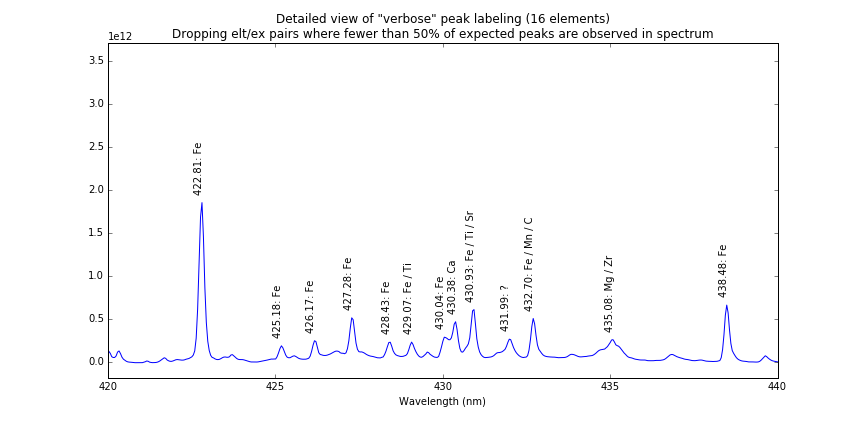

In [23]:
e_to_p, p_to_e, u = label_peaks_verbose(px, df_after_dropping, delta = delta)
elements_verbose_only = sorted(list(set(e_to_p.keys()) - set(elements_parsimonious)))
print "Elements used ({}): {}; {}".format(
    len(e_to_p),
    ', '.join(elements_parsimonious),
    ', '.join(elements_verbose_only))
print "Unlabeled peaks ({} of {}): {}".format(len(u), len(px), ", ".join(["{:.2f}".format(ui) for ui in u]))
ax = show_labeled_spectrum(x = x, y = y, px = px, py = py, xlo = xlo, xhi = xlo + xwidth,
                           p_to_e = p_to_e,
                           p_to_e_parsimonious = p_to_e_parsimonious)
ax.set_title("Detailed view of \"verbose\" peak labeling ({} elements)\n{}".format(len(e_to_p), drop_msg))
if save_figs: plt.savefig("example_peak_label_verbose_after_dropping.png")
None